In [1]:
!pip install librosa


In [32]:
import numpy as np
import pandas as pd

import os

from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from keras import layers
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

In [3]:
%cd C:/Users/dandr/OneDrive/Documents/DanielAndrés/Academico/Maestria Sistemas/202202 Semestre/Aprendizaje de Maquinas/Proyecto

C:\Users\dandr\OneDrive\Documents\DanielAndrés\Academico\Maestria Sistemas\202202 Semestre\Aprendizaje de Maquinas\Proyecto


In [4]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('./Emotions/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('.')[0][::-1]
        name = dirname[::].split('/')[2]
        name_complete = name+'.'+label
        labels.append(name_complete.lower())

In [5]:
data = pd.DataFrame({'speech':paths,'label':labels})
data.sample(10)

,speech,label
9895,./Emotions/Neutral\YAF_hash_neutral.wav,neutral.wav
8282,./Emotions/Neutral\03-01-01-01-01-02-17.wav,neutral.wav
5607,./Emotions/Fearful\1087_DFA_FEA_XX.wav,fearful.wav
5345,./Emotions/Fearful\1068_IOM_FEA_XX.wav,fearful.wav
2093,./Emotions/Angry\YAF_pool_angry.wav,angry.wav
4411,./Emotions/Fearful\1001_ITH_FEA_XX.wav,fearful.wav
12023,./Emotions/Sad\YAF_chair_sad.wav,sad.wav
2125,./Emotions/Angry\YAF_soup_angry.wav,angry.wav
7479,./Emotions/Happy\1074_IWL_HAP_XX.wav,happy.wav
7413,./Emotions/Happy\1069_TIE_HAP_XX.wav,happy.wav


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['label'] = data['label'].apply(lambda x: str(x).split('.wav')[0])
data['label']= label_encoder.fit_transform(data['label'])

In [7]:
data.head()

,speech,label
0,./Emotions/Angry\03-01-05-01-01-01-01.wav,0
1,./Emotions/Angry\03-01-05-01-01-01-02.wav,0
2,./Emotions/Angry\03-01-05-01-01-01-03.wav,0
3,./Emotions/Angry\03-01-05-01-01-01-04.wav,0
4,./Emotions/Angry\03-01-05-01-01-01-05.wav,0


In [8]:
data['label'].unique().tolist()

[0, 1, 2, 3, 4, 5, 6]

In [9]:
def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= data['speech'].apply(lambda x:MFCC(x))

In [27]:
np.save('mfcc.npy', mfcc)

In [29]:
mfcc

0        [-492.3691, 56.363403, -9.584242, 18.014067, -...
1        [-527.9743, 54.69438, -14.746856, 8.957756, -9...
2        [-557.1632, 79.16915, -1.0876596, 23.747974, 1...
3        [-523.06934, 43.876232, -14.765749, 5.915091, ...
4        [-473.48077, 75.53822, -19.6035, 10.482581, 4....
                               ...                        
12793    [-376.5839, 63.959797, -3.0598657, 11.498796, ...
12794    [-355.02838, 87.61325, -22.081991, 2.3526454, ...
12795    [-345.9045, 62.633904, 2.1816177, 3.6597912, -...
12796    [-334.6705, 80.249825, -32.716793, 3.8717272, ...
12797    [-376.12756, 63.290413, -6.5078444, 16.757233,...
Name: speech, Length: 12798, dtype: object

In [11]:
print(f'Cantidad de Registros de Audio: {mfcc.shape}')

Cantidad de Registros de Audio: (12798,)


In [12]:
import numpy as np
X = np.asarray(mfcc.to_list())
y = np.asarray(data['label'])

In [13]:
X

array([[-4.9236911e+02,  5.6363403e+01, -9.5842419e+00, ...,
        -3.0204344e-01, -4.6737876e+00, -1.5017204e+00],
       [-5.2797430e+02,  5.4694382e+01, -1.4746856e+01, ...,
         1.8938642e+00,  4.9922967e-01,  1.0369350e+00],
       [-5.5716321e+02,  7.9169151e+01, -1.0876596e+00, ...,
        -2.7364600e+00, -6.0165200e+00, -1.7894464e+00],
       ...,
       [-3.4590451e+02,  6.2633904e+01,  2.1816177e+00, ...,
         3.1764922e+00, -1.4632544e-01,  2.7278659e+00],
       [-3.3467050e+02,  8.0249825e+01, -3.2716793e+01, ...,
         6.3607258e-01,  1.6670488e+00,  3.2698379e+00],
       [-3.7612756e+02,  6.3290413e+01, -6.5078444e+00, ...,
         5.6975141e+00,  3.1801865e+00,  2.4653609e+00]], dtype=float32)

In [14]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [41]:
np.save('X_SVM.npy', X)
np.save('y_SVM.npy', y)

In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
print(f'Dimensiones mfcc:{X.shape}')
print(f'Dimensiones label:{y.shape}')

Dimensiones mfcc:(12798, 40)
Dimensiones label:(12798,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
svc_model=SVC(gamma='auto')

In [19]:
parameters = {
    'C': [i/10 for i in range(1,11)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto',1/10,1/20]
}

In [20]:
grid = GridSearchCV(estimator=svc_model,
                    param_grid=parameters,
                    scoring=['balanced_accuracy','f1_weighted'],
                    refit= 'balanced_accuracy',
                    verbose=4,
                    cv=3)

In [21]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV 1/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.512) f1_weighted: (test=0.498) total time=   4.0s
[CV 2/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.513) f1_weighted: (test=0.490) total time=   3.7s
[CV 3/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.522) f1_weighted: (test=0.504) total time=   3.8s
[CV 1/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.495) f1_weighted: (test=0.496) total time=   4.2s
[CV 2/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.490) f1_weighted: (test=0.489) total time=   4.2s
[CV 3/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.509) f1_weighted: (test=0.510) total time=   4.3s
[CV 1/3] END C=0.1, gamma=scale, kernel=rbf; balanced_accuracy: (test=0.564) f1_weighted: (test=0.544) total time=   7.2s
[CV 2/3] END C=0.1, gamma=scale, kernel=rbf; balanced_accuracy: (test=0

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'gamma': ['scale', 'auto', 0.1, 0.05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='balanced_accuracy',
             scoring=['balanced_accuracy', 'f1_weighted'], verbose=4)

In [22]:
print(f'Los parametros del mejor modelo: {grid.best_params_}')

Los parametros del mejor modelo: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [23]:
y_pred_test = grid.predict(X_test)

0.6765625
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       221
           1       0.57      0.56      0.57       188
           2       0.71      0.55      0.62       216
           3       0.69      0.59      0.64       222
           4       0.60      0.70      0.64       175
           5       0.67      0.74      0.70       213
           6       0.84      0.96      0.90        45

    accuracy                           0.68      1280
   macro avg       0.69      0.71      0.70      1280
weighted avg       0.68      0.68      0.67      1280



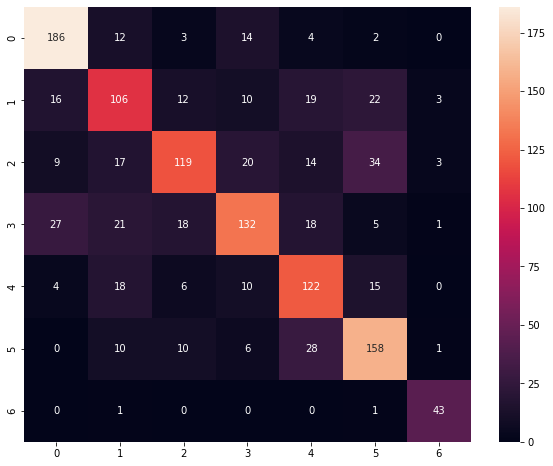

In [24]:
print(accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_test,y_pred_test)) 
matrizr = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(10,8))
sns.heatmap(matrizr, annot=True, fmt="d");

In [28]:

import pickle
pickle.dump(grid, open('SVM.model','wb'))